La base des TPs pour le cours "Classification des données" a été prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, __auteur Yury Kashnitsky__)

# <center> TP 1 : Analyse exploratoire et analyse visuelle de données avec la librairie Pandas et Seaborn

##  <center> Analyse des données de maladies cardiovasculaires

Pour vous entraîner avec les librairies Pandas et Seaborn, et aussi l’AED (Analyse Exploratoire de Données), vous pouvez remplir les lignes ci-dessous où vous analyserez un ensemble de données sur les maladies cardiovasculaires.

### Problème

Prédire la présence ou l'absence de maladie cardiovasculaire (MCV) en utilisant les résultats de l'examen du patient.

### Description des données

Il existe 3 types de caractéristiques d'entrée:

- *Objectives*: informations factuelles;
- *Examinées*: résultats d'un examen médical;
- *Subjectives*: informations données par le patient.

La description des données en anglais :

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Toutes les valeurs du dataset ont été collectées au moment de l'examen médical.

# Analyse préliminaire des données

Tout d'abord, nous allons initialiser l'environnement:

**Ex.1 : Importez tout les bibliothèques nécessaires : `pandas`, `numpy` et `seaborn`**

In [18]:
# You code here
import pandas as pd
import numpy as np
import seaborn as sns

Configurons les bibliothèques `seaborn` and `matplotlib` pour l'analyse visuelle :

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

**Ex.2 : Chargez les données (en utilisant la méthode `read_csv`) du lien `url` indiqué ci-dessous, et affichez les 5 premières lignes en utilisant la méthode `head`:**

In [69]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv"

# You code here
df=pd.read_csv(url,sep=(';'))
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Il serait instructif de jeter un coup d'oeil aux valeurs de nos variables.

Convertissons les données au format *long* et affichons le nombre de valeurs des entités catégoriques en utilisant [`factorplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html).

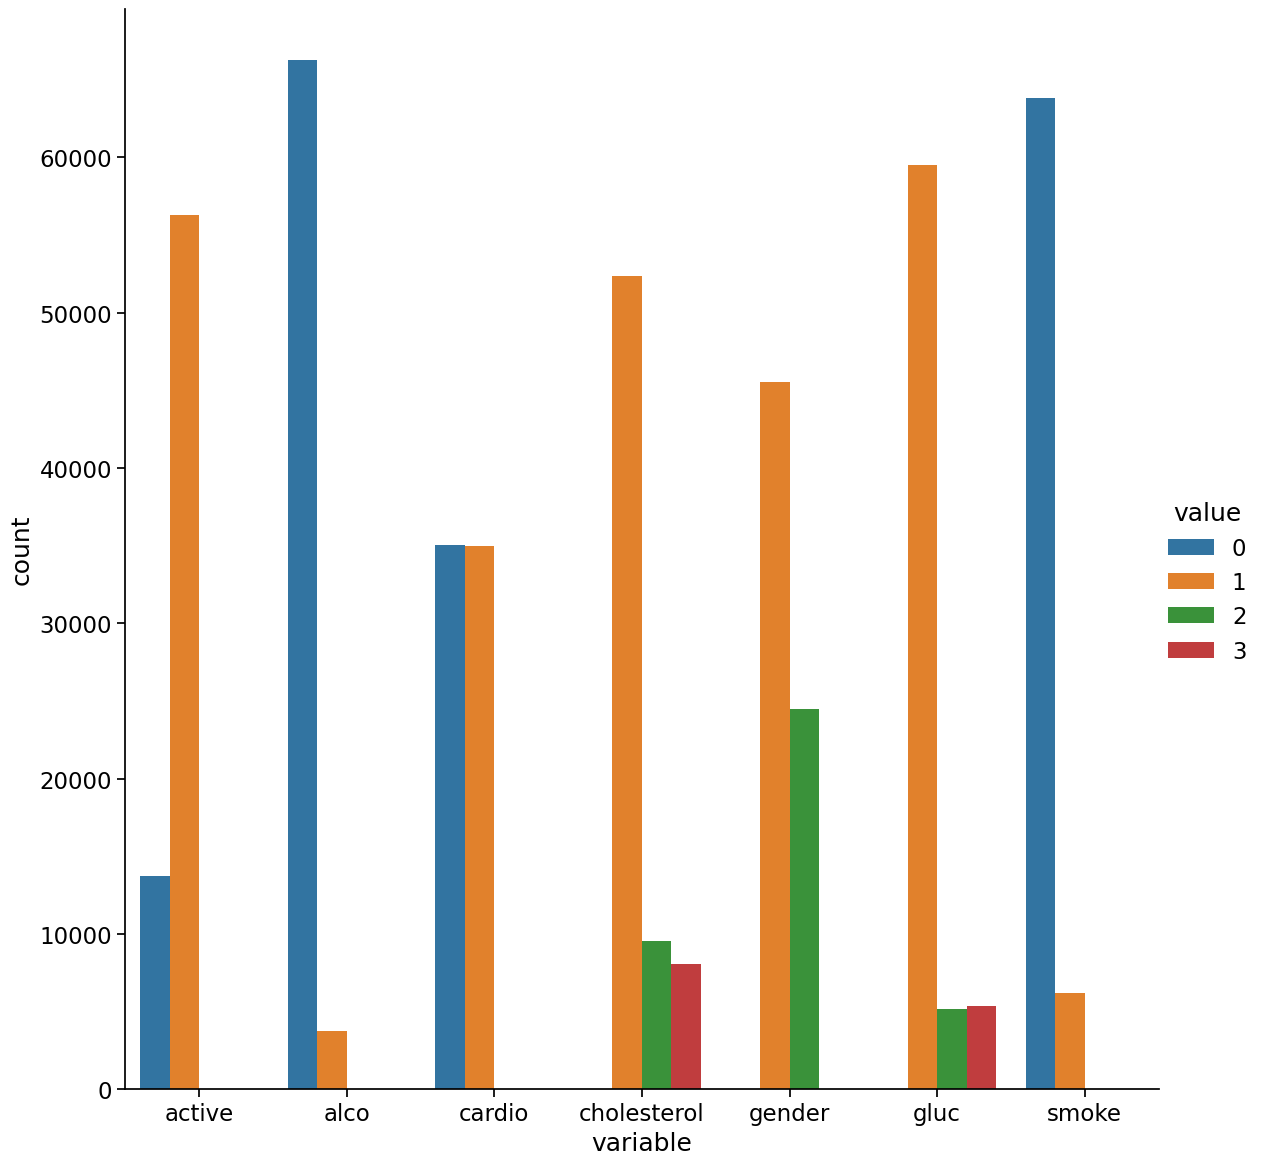

In [29]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.catplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', height=12);

Nous pouvons voir que les classes cibles (cardio = {0,1}) sont équilibrées. C'est génial !

Separons l'ensemble des données selon les valeurs cibles. Peut-on déjà repérer la caractéristique la plus significative simplement en regardant les graphiques ?

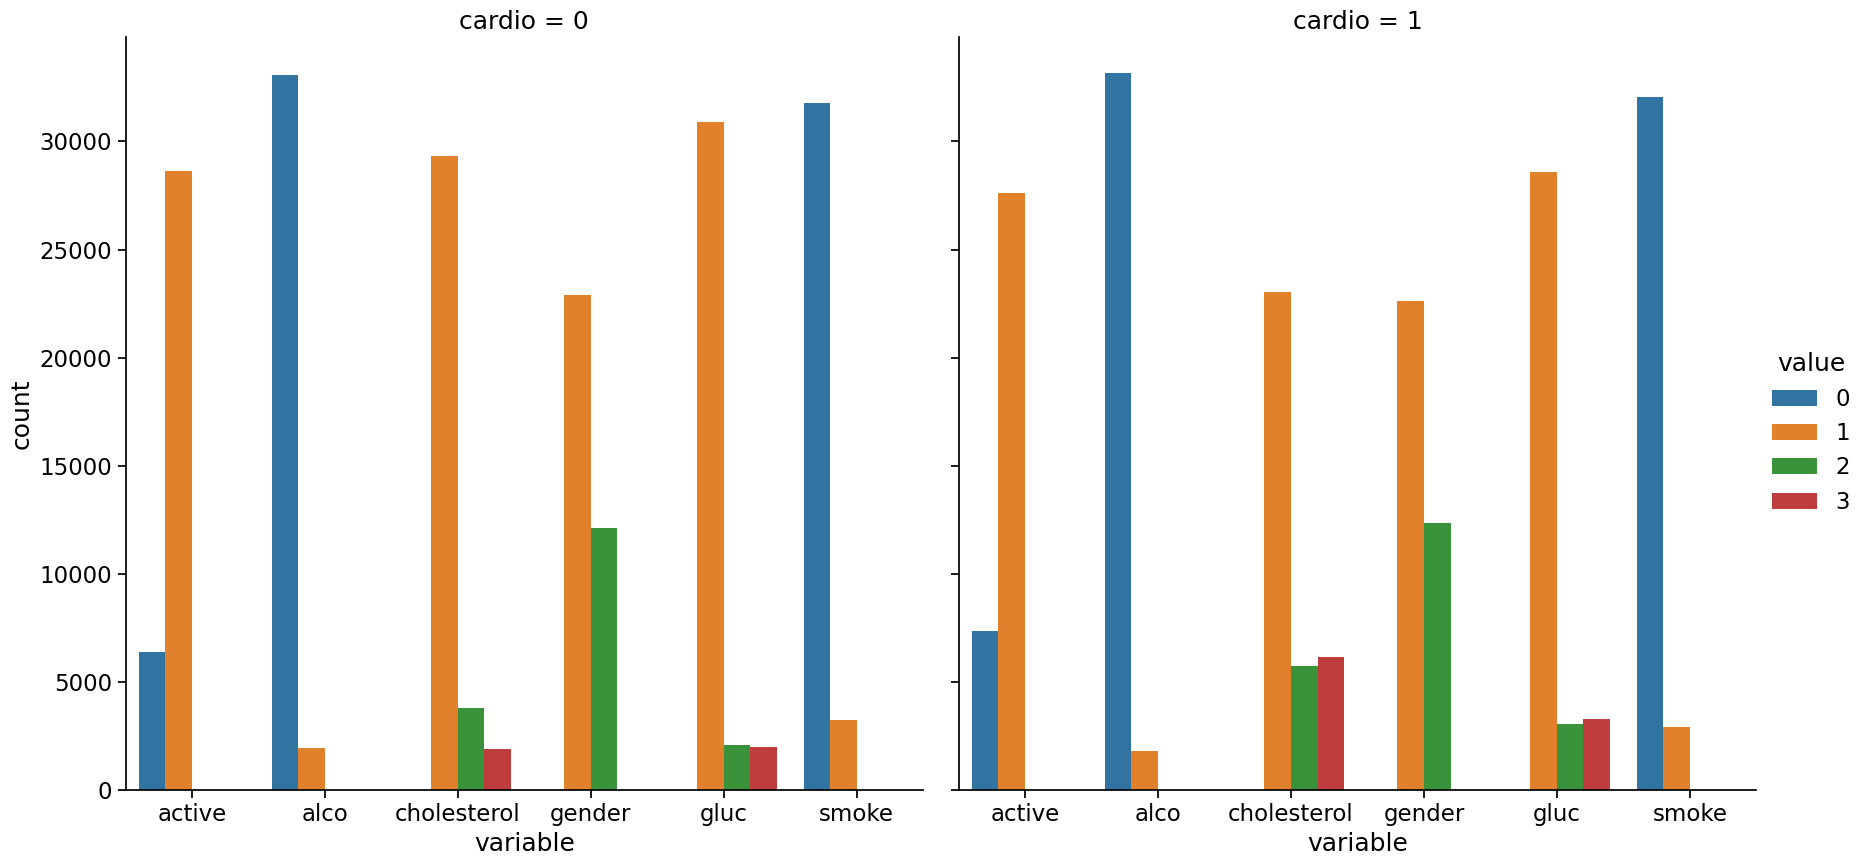

In [24]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.catplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', height=9);

On peut voir que la distribution des niveaux de cholestérol et de glucose diffère grandement par la valeur de la variable cible. Est-ce une coïncidence?

Maintenant, calculons quelques statistiques pour les valeurs uniques de la caracteristique:

In [31]:
print("All features unique values : \n")
print("\t", 10 * '-')
for c in df.columns:
    n = df[c].nunique()
    print("\t", c)
    if n <= 3:
        print("\t", n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print("\t", n)
    print("\t", 10 * '-')

All features unique values : 

	 ----------
	 id
	 70000
	 ----------
	 age
	 8076
	 ----------
	 gender
	 2 [(1, 45530), (2, 24470)]
	 ----------
	 height
	 109
	 ----------
	 weight
	 287
	 ----------
	 ap_hi
	 153
	 ----------
	 ap_lo
	 157
	 ----------
	 cholesterol
	 3 [(1, 52385), (2, 9549), (3, 8066)]
	 ----------
	 gluc
	 3 [(1, 59479), (2, 5190), (3, 5331)]
	 ----------
	 smoke
	 2 [(0, 63831), (1, 6169)]
	 ----------
	 alco
	 2 [(0, 66236), (1, 3764)]
	 ----------
	 active
	 2 [(0, 13739), (1, 56261)]
	 ----------
	 cardio
	 2 [(0, 35021), (1, 34979)]
	 ----------


**Finalement, nous avons:**
- 5 caractéristiques numériques (hors *id*);
- 7 caractéristiques catégoriques;
- 70000 enregistrements au total.

## 1.1. Observations basiques

**Ex. 3 : Combien d'hommes et de femmes sont présents dans cet ensemble de données ?** 

Les valeurs de la caractéristique `gender` n'ont pas été données (c'est pas clair que "1" représente les femmes ou les hommes) - déterminez-le en analysant la taille, en supposant que les hommes sont plus grands en moyenne.

In [39]:
# You code here
df.groupby('gender').height.mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

1 : Femmes

2 : Hommes

**Ex. 4 : Quel `gender` déclare le plus souvent consommer de l'alcool - hommes ou femmes ?**

In [41]:
# You code here
df.groupby('gender').alco.value_counts()

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: alco, dtype: int64

Les hommes

**Ex. 5 : Quelle est la différence entre les pourcentages de fumeurs chez les hommes et les femmes (arrondi) ?**

In [59]:
# You code here
fumeurs=df[df['smoke']==1]
fumeurs_by_gender=fumeurs.groupby('gender').smoke.value_counts()
total=fumeurs_by_gender[2,1]+fumeurs_by_gender[1,1]
percentage_men=fumeurs_by_gender[2,1]/total
percentage_women=fumeurs_by_gender[1,1]/total

diff=round(percentage_men-percentage_women,2)
diff


0.74

**Ex. 6 : Quelle est la différence entre les valeurs médianes d'âge chez les fumeurs et les non-fumeurs (en mois, arrondies) ?** 

Vous devrez déterminer les unités de la caractéristique `age_in_month` dans cet ensemble de données.

In [100]:
# You code here
df['age_in_month']=np.int_(df['age']/30)

fum=df[df['smoke']==1]['age_in_month'].median()
nfum=df[df['smoke']==0]['age_in_month'].median()


diffe=round(np.abs(fum-nfum),2)
diffe




20.0

## 1.2. Analyse du BMI (Body Mass Index)

**Ex. 7 : Créez une nouvelle caracteristique – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)).**

Pour ce faire, divisez le poids en kilogrammes par le carré de la taille en mètres. On dit que les valeurs normales du BMI sont de 18,5 à 25.

In [72]:
# You code here
df['BMI']=df.weight/((df.height/100)**2)

In [74]:
df['BMI'].head()

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: BMI, dtype: float64

**Ex. 8 : Choisissez les expressions correctes et argumentez votre choix :**

1. La medianne du BMI dans les données se situe dans la plage des valeurs normales du BMI.
2. Le BMI des femmes est en moyenne plus élevé que celui des hommes.
3. Les personnes en bonne santé ont, en moyenne, un BMI plus élevé que les personnes atteintes d'une MCV.
4. Pour les hommes en bonne santé qui ne boivent pas, le BMI est plus proche de la norme que pour les femmes en bonne santé qui ne boivent pas.

In [94]:
# You code here
print('La medianne du BMI : {}'.format(df.BMI.median()))
print('Le BMI des femmes est en moyenne : {} \nLe BMI des hommes est en moyenne : {}'.format(df[df.gender==1]['BMI'].mean(), df[df.gender==2]['BMI'].mean() ))
print( 'MCV : {}, \nBonne santé : {}'.format(df[df.cardio==1]['BMI'].mean(),df[df.cardio==0]['BMI'].mean()))
print('Le BMI des femmes qui ne boivent pas : {} \nLe BMI des hommes qui ne boivent pas : {}'.format(
    df[(df.gender==1) & (df.alco==0)]['BMI'].mean()-25, 
    df[(df.gender==2) & (df.alco==0)]['BMI'].mean()-25 )
    )



La medianne du BMI : 26.374068120774975
Le BMI des femmes est en moyenne : 27.98758344183285 
Le BMI des hommes est en moyenne : 26.754442357289356
MCV : 28.56606062701535, 
Bonne santé : 26.5481752067945
Le BMI des femmes qui ne boivent pas : 2.9417507117019817 
Le BMI des hommes qui ne boivent pas : 1.7115393368105138


## Réponse :

1.Fause

2.Vraie

3.Fausse

4.Vraie